# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
# Mount Google drive to access the dataset
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [18]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
                                                                                                 # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam, SGD                                                # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.metrics import classification_report                                                # Importing the classification report
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# Load the dataset
import h5py

data = h5py.File('/content/drive/MyDrive/Thurmans Elective Project/SVHN_single_grey1.h5', 'r')


In [ ]:
X_train = data['X_train'][:]

y_train = data['y_train'][:]

X_test = data['X_test'][:]

y_test = data['y_test'][:]

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train)

42000

In [ ]:
len(X_test)

18000

In [ ]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

**Observation: There are 40,000 images in training dataset and 18,000 in the test dataset. The labels are stored as an array of integers.**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

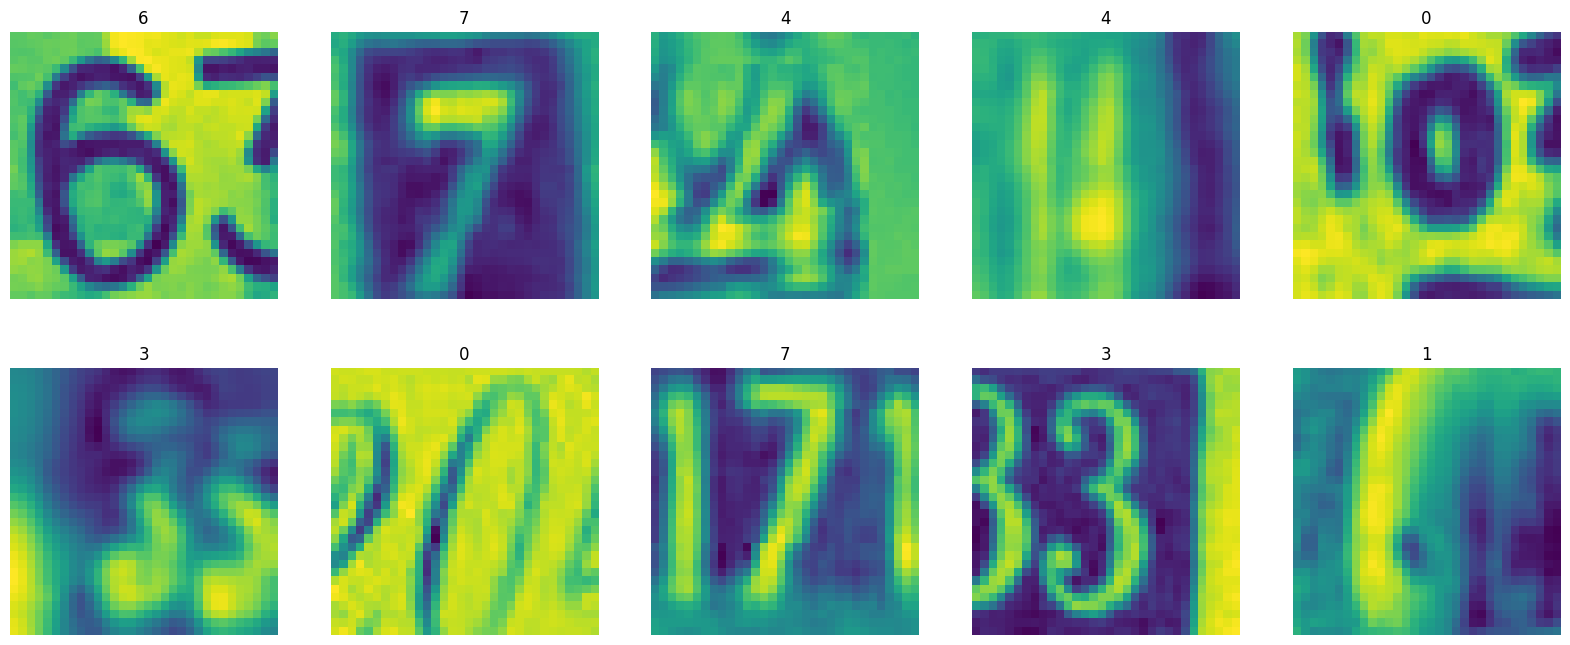

In [ ]:
plt.figure(figsize = (20, 8))

for i in range(1, 11, 1):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i])
    plt.axis('Off')
    plt.title(y_train[i])
plt.show()

**Observations:**  The fourth image in the top row, a 4 is so blurry I would not be able to identify it as a four if it were not labeled.  There are multiple numbers included in the training images in 5 of the 10 images, which may confuse the model during training.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
X_train[0].shape

(32, 32)

The images are 32 by 32 pixels.

### **Normalize the train and the test data**

In [ ]:
#Normalize the data by dividing by the maximum pixel value.
X_train=X_train/255
X_test=X_test/255

Print the shapes of Training and Test data

In [ ]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


### **One-hot encode output**

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
print('y_train_encoded shape', y_train_encoded.shape)
y_test_encoded = tf.keras.utils.to_categorical(y_test)
print('y_test_encoded shape', y_test_encoded.shape)

y_train_encoded shape (42000, 10)
y_test_encoded shape (18000, 10)


**Observation: The y_train dataset is now a 42,000x10 matrix, and y_test is 18,000x10 matrix.  There is one column for each number.**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
ann_model1=Sequential()
# Adding Flatten layer
ann_model1.add(Flatten(input_shape = (32, 32, 1)))
# Adding First Dense or Fully Connected Layer
ann_model1.add(Dense(64, activation = 'relu'))
# Adding Second Dense or Fully Connected Layer
ann_model1.add(Dense(32, activation = 'relu'))
# Adding Classifier
ann_model1.add(Dense(10, activation = 'softmax'))

# Compiling the model
opt=Adam(learning_rate = 0.001)
ann_model1.compile(optimizer = opt, loss = 'categorical_crossentropy',  metrics = ['accuracy'])

# Printing out the model summary
ann_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


**Observation:**  The model has 68,000 trainable parameters to learn.

In [ ]:
history_1 = ann_model1.fit(
            X_train, y_train_encoded,
            epochs = 20,
            validation_split = 0.2,
            batch_size = 128,
            verbose = 1
)

Epoch 1/20
260/260 [==============================] - 5s 15ms/step - loss: 2.3066 - accuracy: 0.1004 - val_loss: 2.3025 - val_accuracy: 0.0939
Epoch 2/20
260/260 [==============================] - 4s 17ms/step - loss: 2.2888 - accuracy: 0.1252 - val_loss: 2.2344 - val_accuracy: 0.1498
Epoch 3/20
260/260 [==============================] - 2s 6ms/step - loss: 2.1337 - accuracy: 0.2066 - val_loss: 1.9713 - val_accuracy: 0.3127
Epoch 4/20
260/260 [==============================] - 1s 5ms/step - loss: 1.7863 - accuracy: 0.3845 - val_loss: 1.6179 - val_accuracy: 0.4484
Epoch 5/20
260/260 [==============================] - 1s 5ms/step - loss: 1.5618 - accuracy: 0.4703 - val_loss: 1.5228 - val_accuracy: 0.4820
Epoch 6/20
260/260 [==============================] - 2s 6ms/step - loss: 1.4728 - accuracy: 0.5048 - val_loss: 1.4232 - val_accuracy: 0.5252
Epoch 7/20
260/260 [==============================] - 1s 5ms/step - loss: 1.4203 - accuracy: 0.5272 - val_loss: 1.4018 - val_accuracy: 0.5333
Epoc

### **Plot the Training and Validation Accuracies and write down your Observations.**

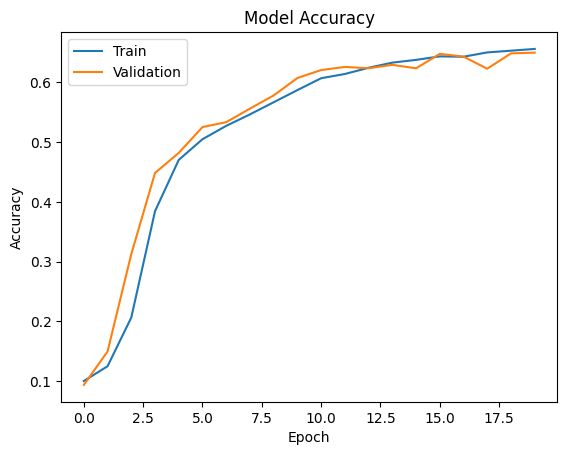

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:  The training and validation performance show good alignment indicating that the model has good generalization and is not overfitting.
 However, the model performance begins leveling out at 65% indicating that it has reached maximum performance for this architecture._______**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
ann_model2=Sequential()
# Adding Flatten layer
ann_model2.add(Flatten(input_shape = (32, 32, 1)))
# Adding First Dense or Fully Connected Layer
ann_model2.add(Dense(256, activation = 'relu'))
# Adding Second Dense or Fully Connected Layer with 20% Dropout
ann_model2.add(Dense(128, activation = 'relu'))
ann_model2.add(Dropout(0.2))
# Adding Third Dense or Fully Connected Layer
ann_model2.add(Dense(64, activation = 'relu'))
# Adding Fourth Dense or Fully Connected Layer
ann_model2.add(Dense(64, activation = 'relu'))
# Adding Fifth Dense or Fully Connected Layer with Batch Normalization
ann_model2.add(Dense(32, activation = 'relu'))
ann_model2.add(BatchNormalization())
# Adding Classifier
ann_model2.add(Dense(10, activation = 'softmax'))

# Compiling the model
opt=Adam(learning_rate = 0.0005)
ann_model2.compile(optimizer = opt, loss = 'categorical_crossentropy',  metrics = ['accuracy'])

# Printing out the model summary
ann_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)               

**Observations:**  The second ANN model has significantly more trainable parameters 310,000 and will require more computational resources.

In [ ]:
history_2 = ann_model2.fit(
            X_train, y_train_encoded,
            epochs = 30,
            validation_split = 0.2,
            batch_size = 128,
            verbose = 1
)

Epoch 1/30
263/263 [==============================] - 5s 14ms/step - loss: 2.3443 - accuracy: 0.1037 - val_loss: 2.3004 - val_accuracy: 0.1068
Epoch 2/30
263/263 [==============================] - 4s 16ms/step - loss: 2.1416 - accuracy: 0.1877 - val_loss: 1.9979 - val_accuracy: 0.3148
Epoch 3/30
263/263 [==============================] - 5s 18ms/step - loss: 1.6842 - accuracy: 0.4129 - val_loss: 1.5905 - val_accuracy: 0.4594
Epoch 4/30
263/263 [==============================] - 3s 12ms/step - loss: 1.3771 - accuracy: 0.5425 - val_loss: 1.1697 - val_accuracy: 0.6299
Epoch 5/30
263/263 [==============================] - 3s 12ms/step - loss: 1.2146 - accuracy: 0.6066 - val_loss: 1.1199 - val_accuracy: 0.6400
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1338 - accuracy: 0.6363 - val_loss: 1.0854 - val_accuracy: 0.6546
Epoch 7/30
263/263 [==============================] - 5s 18ms/step - loss: 1.0845 - accuracy: 0.6522 - val_loss: 1.0042 - val_accuracy: 0.6898

### **Plot the Training and Validation Accuracies and write down your Observations.**

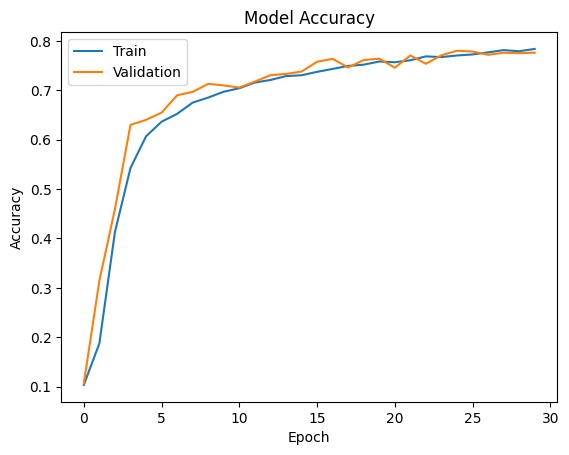

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations: Again the model fit the training data well without overfitting.
 This time performance improved with accuracy reaching 77%._______**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Here we would get the output as probablities for each category
y_pred = ann_model2.predict(X_test)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded,axis = 1)
# Printing the classification report
print(classification_report(y_test_arg, y_pred_arg))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1814
           1       0.73      0.78      0.75      1828
           2       0.80      0.79      0.80      1803
           3       0.72      0.77      0.74      1719
           4       0.82      0.81      0.81      1812
           5       0.76      0.71      0.74      1768
           6       0.84      0.69      0.76      1832
           7       0.76      0.83      0.79      1808
           8       0.69      0.77      0.73      1812
           9       0.77      0.76      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

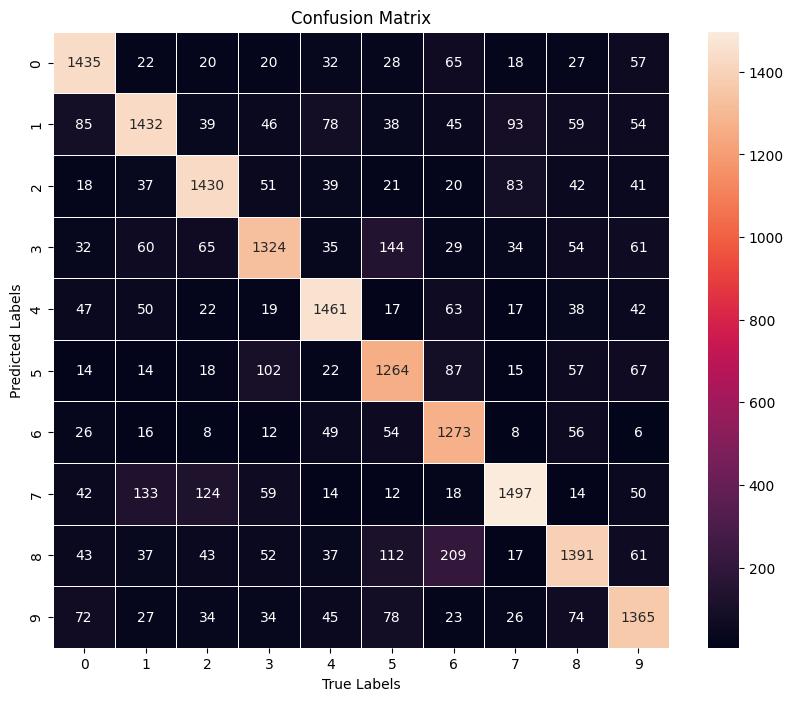

In [ ]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)

f, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = .4,
    fmt = "d",
    square = True,
    ax = ax
)

# Setting the labels to both the axes
ax.set_xlabel('True Labels');ax.set_ylabel('Predicted Labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels([elem for elem in np.arange(0,10,1)])
ax.yaxis.set_ticklabels([elem for elem in np.arange(0,10,1)])
plt.show()

**Final Observations:**  The second ANN model performed much better with 77% accuracy verse 65% for the first model.  The model provides reasonable F1 scores accross all numbers.  The lowest precision is for 8 with 69%, and the lowest recall is for 6 with 69%.  The model tends to confuse sixes for eights. Other numbers that are incorrectly identified are 1, 2, and 7.  The model may be further improved with CNNs which are more robust to spatial variance.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [3]:
# Load the dataset
import h5py

data = h5py.File('/content/drive/MyDrive/Thurmans Elective Project/SVHN_single_grey1.h5', 'r')

In [4]:
#Split the data into test and training datasets.
X_train = data['X_train'][:]

y_train = data['y_train'][:]

X_test = data['X_test'][:]

y_test = data['y_test'][:]

Check the number of images in the training and the testing dataset.

In [7]:
print('The Training data has', len(X_train), 'images')
print('The Testing data has', len(X_test), 'images')

The Training data has 42000 images
The Testing data has 18000 images


**Observation:  The training data has 42,000 images and the testing data has 18,000 images.**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [8]:
#Return the pixel size of the first image in the training dataset.
X_train[0].shape

(32, 32)

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [11]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))

Normalize inputs from 0-255 to 0-1

In [12]:
X_train=X_train/255
X_test=X_test/255

Print New shape of Training and Test

In [14]:
print('The shape of the Training data is', X_train.shape)
print('The shape of the Testing data is', X_test.shape)

The shape of the Training data is (42000, 32, 32, 1)
The shape of the Testing data is (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [15]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
print('y_train_encoded shape', y_train_encoded.shape)
y_test_encoded = tf.keras.utils.to_categorical(y_test)
print('y_test_encoded shape', y_test_encoded.shape)

y_train_encoded shape (42000, 10)
y_test_encoded shape (18000, 10)


**Observation: The y training and test data is now a matrix that has 10 columns for each image corresponding to the 10 different numbers.**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [16]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [19]:
# Initialized a sequential model
cnn_model_1 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of images
cnn_model_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_1.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
cnn_model_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_1.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
cnn_model_1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 2D output of the convolutional layer after max pooling to make it ready for creating dense connections
cnn_model_1.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
cnn_model_1.add(Dense(32))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_1.add(LeakyReLU(0.1))

# Adding the output layer with 10 neurons and 'softmax' activation function (for a multi-class classification problem)
cnn_model_1.add(Dense(10, activation = 'softmax'))

# Compiling the model
opt=Adam(learning_rate = 0.001)
cnn_model_1.compile(optimizer = opt, loss = 'categorical_crossentropy',  metrics = ['accuracy'])


In [20]:
# Printing out the model summary
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

**Observations:** There are 267,000 trainable paramaters in the cnn model, which is less than the second ann model.

In [21]:
history_3 = cnn_model_1.fit(
            X_train, y_train_encoded,
            epochs = 20,
            validation_split = 0.2,
            batch_size = 32,
            verbose = 1
)

Epoch 1/20
1050/1050 [==============================] - 123s 116ms/step - loss: 1.0571 - accuracy: 0.6593 - val_loss: 0.6093 - val_accuracy: 0.8248
Epoch 2/20
1050/1050 [==============================] - 113s 108ms/step - loss: 0.5147 - accuracy: 0.8521 - val_loss: 0.4919 - val_accuracy: 0.8601
Epoch 3/20
1050/1050 [==============================] - 102s 98ms/step - loss: 0.4268 - accuracy: 0.8751 - val_loss: 0.4997 - val_accuracy: 0.8563
Epoch 4/20
1050/1050 [==============================] - 147s 140ms/step - loss: 0.3679 - accuracy: 0.8907 - val_loss: 0.4468 - val_accuracy: 0.8764
Epoch 5/20
1050/1050 [==============================] - 125s 119ms/step - loss: 0.3243 - accuracy: 0.9030 - val_loss: 0.4593 - val_accuracy: 0.8721
Epoch 6/20
1050/1050 [==============================] - 114s 108ms/step - loss: 0.2867 - accuracy: 0.9150 - val_loss: 0.4803 - val_accuracy: 0.8629
Epoch 7/20
1050/1050 [==============================] - 121s 115ms/step - loss: 0.2574 - accuracy: 0.9213 - val_l

### **Plot the Training and Validation Accuracies and Write your observations.**

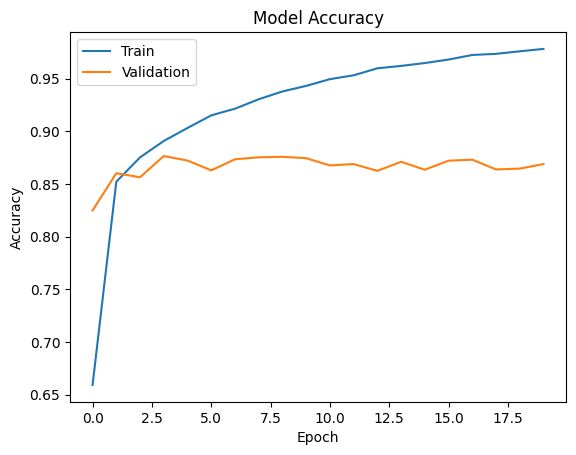

In [22]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:__Early on, after about 3 Epochs, the model began overfitting.
 The training accuracy improved the entire time, but additional gains in accuracy of the validation data were not observed.  Despite the high accuracy attained of the training data 98%, the generalization of the model is poor with only 87% validation accuracy.________**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [23]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [24]:
# Initialized a sequential model
cnn_model_2 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding. The input_shape denotes input dimension of images
cnn_model_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
cnn_model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
cnn_model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding adding batch normalization to the output of second convolutional layer
cnn_model_2.add(BatchNormalization())

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
cnn_model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
cnn_model_2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of fourth convolutional layer
cnn_model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding adding batch normalization to the output of fourth convolutional layer
cnn_model_2.add(BatchNormalization())

# Flattening the 2D output of the convolutional layer after max pooling to make it ready for creating dense connections
cnn_model_2.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
cnn_model_2.add(Dense(32))

# Adding a dropout layer of 50% to prevent overfitting
cnn_model_2.add(Dropout(0.5))

# Adding LeakyRelu activation function with a negative slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

# Adding the output layer with 10 neurons and 'softmax' activation function (for a multi-class classification problem)
cnn_model_2.add(Dense(10, activation = 'softmax'))

# Compiling the model
opt=Adam(learning_rate = 0.001)
cnn_model_2.compile(optimizer = opt, loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [25]:
# Printing out the model summary
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

**Observations:** Despite the extra 2 convolutional layers the model has less trainable parameters due to the max pooling layers.  Additionally, the dropout layer should help with overfitting.

In [26]:
history_4 = cnn_model_2.fit(
            X_train, y_train_encoded,
            epochs = 30,
            validation_split = 0.2,
            batch_size = 128,
            verbose = 1
)

Epoch 1/30
263/263 [==============================] - 190s 718ms/step - loss: 1.3271 - accuracy: 0.5491 - val_loss: 1.8763 - val_accuracy: 0.3475
Epoch 2/30
263/263 [==============================] - 160s 609ms/step - loss: 0.6722 - accuracy: 0.7940 - val_loss: 0.5646 - val_accuracy: 0.8446
Epoch 3/30
263/263 [==============================] - 161s 611ms/step - loss: 0.5530 - accuracy: 0.8310 - val_loss: 0.4333 - val_accuracy: 0.8739
Epoch 4/30
263/263 [==============================] - 157s 597ms/step - loss: 0.4921 - accuracy: 0.8483 - val_loss: 0.4754 - val_accuracy: 0.8651
Epoch 5/30
263/263 [==============================] - 157s 598ms/step - loss: 0.4399 - accuracy: 0.8624 - val_loss: 0.3768 - val_accuracy: 0.8963
Epoch 6/30
263/263 [==============================] - 158s 603ms/step - loss: 0.4033 - accuracy: 0.8764 - val_loss: 0.3743 - val_accuracy: 0.8935
Epoch 7/30
263/263 [==============================] - 167s 636ms/step - loss: 0.3876 - accuracy: 0.8813 - val_loss: 0.3795 -

### **Plot the Training and Validation accuracies and write your observations.**

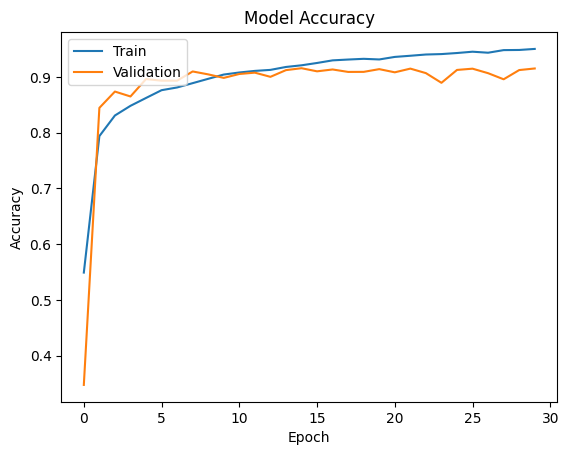

In [27]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:___The CNN model demonstrated much greater generalization with this architecture.  The validation data followed the performance on the test data much closer than the first CNN model.  The dropout layer helped with the model enhancement.  The accuracy achieved was also much greater at 91%._____**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [28]:
# Here we would get the output as probablities for each category
y_pred = cnn_model_2.predict(X_test)

563/563 [==============================] - 24s 41ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [29]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded,axis = 1)
# Printing the classification report
print(classification_report(y_test_arg, y_pred_arg))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.89      0.93      0.91      1828
           2       0.94      0.90      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.93      0.88      0.90      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



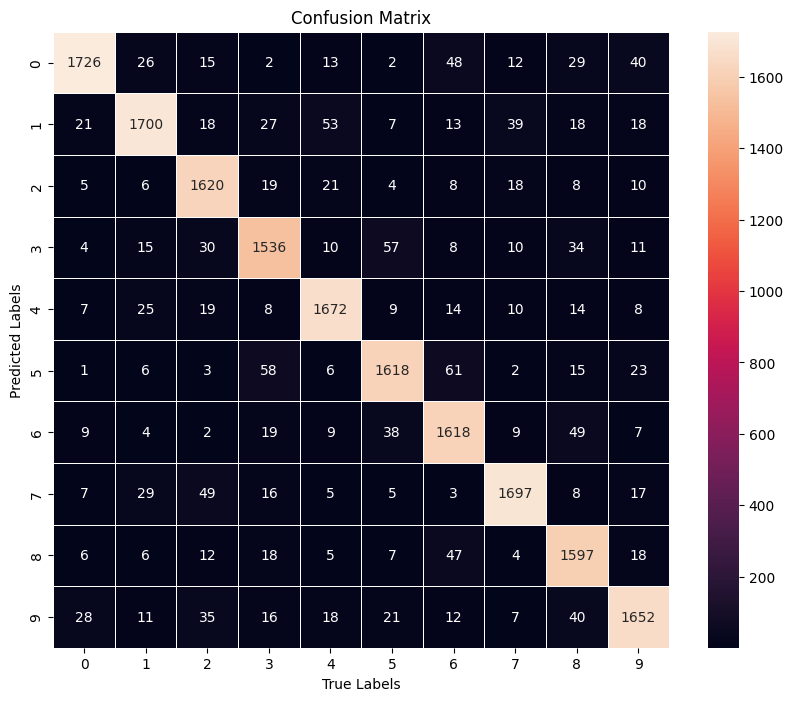

In [30]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)

f, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = .4,
    fmt = "d",
    square = True,
    ax = ax
)

# Setting the labels to both the axes
ax.set_xlabel('True Labels');ax.set_ylabel('Predicted Labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels([elem for elem in np.arange(0,10,1)])
ax.yaxis.set_ticklabels([elem for elem in np.arange(0,10,1)])
plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**  The CNN architecture provided the best model and achieved the greatest performance.  Model 2 of the CNN had an overall accuracy of 91%, while the best accuracy achieved with the ANN model was 77%.  The model had excellent precision and recall across the 10 numbers.  There were certain numbers that were more difficult to distinguish such as 7 and 2. The model was much more likely to identify a 2 as a 7 than vice versa.  Other numbers including 5,6, and 8, as well as the pair 1 and 4, were likely to be confused with each other. The numbers that were confused make sense due to the similarity in their structure. Overall the model performed very well. The model could possibly be improved further by performing hyperparameter optimization, image augmentation, and using higher resolution images.  While previewing the training data, it can be observed that there are multiple numbers in some images, and that a few pictures are so blurry it is difficult for the human eye to identify.